# 3.1 Pre-processing and Transformation

Python program to pre-process and transform the dataset into a format suitable for developing machine learning models. For feature selection, using the filter method.

In [1]:
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

from bamboo.gwp_pipeline import gwp_pipeline
from bamboo.star_pipeline import star_pipeline
from bamboo.processing import read_csv, split_features_and_target, get_feature_and_target_names
from bamboo.selection import normalize_data, get_const_features, get_feature_correlations, plot_feature_correlations, get_low_correlation_features

SEED = 40
GWP_CSV = 'datasets/gwp_assessment.csv'
STAR_CSV = 'datasets/star_assessment.csv'

In [2]:
# Load data from csv
gwp_data = read_csv(GWP_CSV)
star_data = read_csv(STAR_CSV)

print(gwp_data)
print(gwp_data.dtype)
print("\n")
print(star_data)
print(star_data.dtype)

/Users/nickolaitchesnokov/Desktop/Code/Projects/data_mining/bamboo/processing.py:12: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(csv_file, delimiter=',', dtype=None, names=True)


[(b'1/1/2015', b'Quarter1', b'sweing', b'Thursday',  8, 0.8 , 26.16, 1108, 7080, 98, 0.,  0, 0, 59. , 0.94072542)
 (b'1/1/2015', b'Quarter1', b'finishing ', b'Thursday',  1, 0.75,  3.94,   -1,  960,  0, 0.,  0, 0,  8. , 0.8865    )
 (b'1/1/2015', b'Quarter1', b'sweing', b'Thursday', 11, 0.8 , 11.41,  968, 3660, 50, 0.,  0, 0, 30.5, 0.80057049)
 ...
 (b'3/11/2015', b'Quarter2', b'', b'Wednesday',  7, 0.65,  3.9 ,   -1,  960,  0, 0., -1, 0,  8. , 0.625625  )
 (b'3/11/2015', b'Quarter2', b'finishing', b'Wednesday',  9, 0.75,  2.9 ,   -1, 1800,  0, 0.,  0, 0, 15. , 0.50588889)
 (b'3/11/2015', b'Quarter2', b'finishing', b'Wednesday',  6, 0.7 ,  2.9 ,   -1,  720,  0, 0.,  0, 0,  6. , 0.39472222)]
[('date', 'S9'), ('quarter', 'S8'), ('department', 'S10'), ('day', 'S9'), ('team', '<i8'), ('targeted_productivity', '<f8'), ('smv', '<f8'), ('wip', '<i8'), ('over_time', '<i8'), ('incentive', '<i8'), ('idle_time', '<f8'), ('idle_men', '<i8'), ('no_of_style_change', '<i8'), ('no_of_workers', '<f8'),

In [3]:
# Process data
gwp_dataset = gwp_pipeline(gwp_data)
star_dataset = star_pipeline(star_data)

print("GWP Dataset: ", gwp_dataset)
print(gwp_dataset.dtype)
print("\n")
print("Star Dataset: ", star_dataset)
print(star_dataset.dtype)

GWP Dataset:  [(2015, 1,  1, 0., 1., 3.,  8., 0.8 , 26.16,  1.108e+03, 7080., 98., 0.,  0., 0., 59. , 0.94072542)
 (2015, 1,  1, 0., 0., 3.,  1., 0.75,  3.94, -1.000e+00,  960.,  0., 0.,  0., 0.,  8. , 0.8865    )
 (2015, 1,  1, 0., 1., 3., 11., 0.8 , 11.41,  9.680e+02, 3660., 50., 0.,  0., 0., 30.5, 0.80057049)
 ...
 (2015, 3, 11, 1., 1., 5.,  7., 0.65,  3.9 , -1.000e+00,  960.,  0., 0., -1., 0.,  8. , 0.625625  )
 (2015, 3, 11, 1., 0., 5.,  9., 0.75,  2.9 , -1.000e+00, 1800.,  0., 0.,  0., 0., 15. , 0.50588889)
 (2015, 3, 11, 1., 0., 5.,  6., 0.7 ,  2.9 , -1.000e+00,  720.,  0., 0.,  0., 0.,  6. , 0.39472222)]
[('year', '<i8'), ('month', '<i8'), ('day_of_month', '<i8'), ('quarter', '<f8'), ('department', '<f8'), ('day', '<f8'), ('team', '<f8'), ('targeted_productivity', '<f8'), ('smv', '<f8'), ('wip', '<f8'), ('over_time', '<f8'), ('incentive', '<f8'), ('idle_time', '<f8'), ('idle_men', '<f8'), ('no_of_style_change', '<f8'), ('no_of_workers', '<f8'), ('actual_productivity', '<f8')]



### Filter method for feature selection

We will evaluate the significance of each feature independently,using different methods to filter out insignificant features and help determine each feature's relative importance. 

#### 1. Removing Near-Constant Features
Near-constant features are those that have very low variance across all instances in the dataset. These features do not contribute much useful information to the model, as they barely help in discriminating between different instances. Therefore, it is beneficial to remove them from the dataset before training a machine learning model.

#### 2. Correlation Coefficients Between Input Features and the Target Variable

This code calculates the correlation coefficients between each input feature and the target variable using NumPy's corrcoef function. It then creates a dictionary called feature_correlations, which maps the feature names to their corresponding correlation coefficients. This dictionary allows for easy interpretation of the linear relationship between each feature and the target variable.

### GWP Feature Selection

In [5]:
# Split feature and target sets
X, y = split_features_and_target(gwp_dataset)
X_names, y_name = get_feature_and_target_names(gwp_dataset)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Normalise the data 
X_train, X_test = normalize_data(X_train, X_test)


#### Near-constant features

In [6]:
constant_threshold = 0.01
selected_columns, constant_columns = get_const_features(X_train, X_names, threshold=0.01)

print('Selected columns:', selected_columns)
print('Constant columns:', constant_columns)

Selected columns: ['month', 'day_of_month', 'quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
Constant columns: ['year', 'incentive', 'idle_time']


#### Feature correlation
If we take a closer look at the coefficients we can see that year, smv, and targeted_productivity are `NaN`, indicating that there is no correlation between these feature & target values.    



['year']


/Users/nickolaitchesnokov/Desktop/Code/Projects/data_mining/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nickolaitchesnokov/Desktop/Code/Projects/data_mining/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


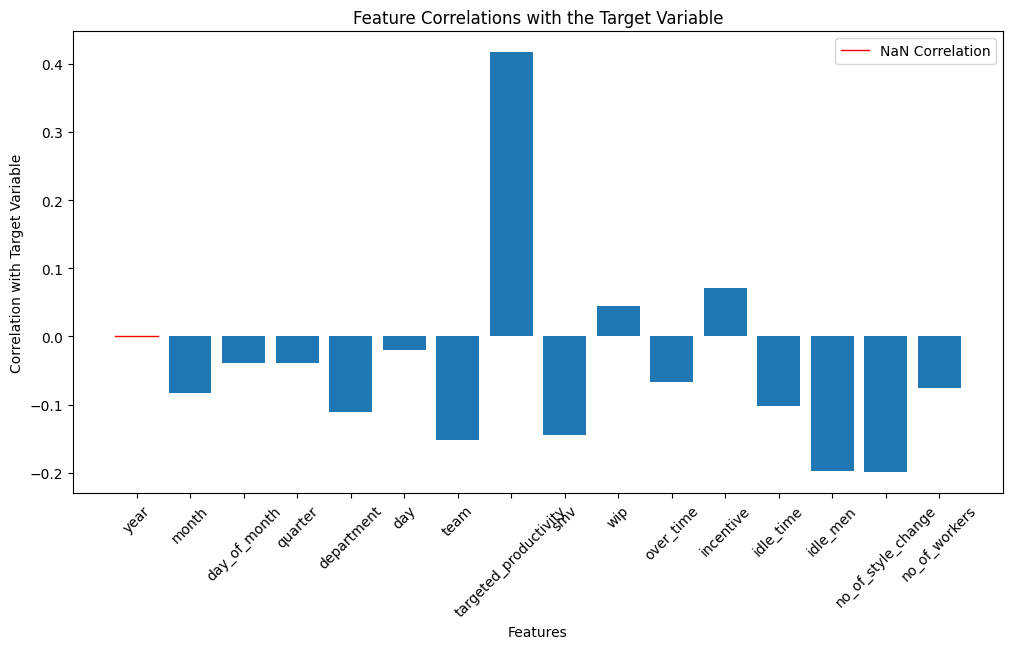

In [7]:
feature_correlations = get_feature_correlations(X_train, y_train, X_names)
plot_feature_correlations(feature_correlations)

#### Feature correlation threshold

In [8]:
correlation_threshold = 0.05

low_correlation_features = get_low_correlation_features(feature_correlations, threshold=correlation_threshold)

print ('Low correlation features:', low_correlation_features)

Low correlation features: ['year', 'day_of_month', 'quarter', 'day', 'wip']


### STAR Feature Selection

In [9]:
# Split feature and target sets
X, y = split_features_and_target(star_dataset)
X_names, y_name = get_feature_and_target_names(star_dataset)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Normalise the data 
X_train, X_test = normalize_data(X_train, X_test)

#### Near-constant features

In [10]:
constant_threshold = 0.01
selected_columns, constant_columns = get_const_features(X_train, X_names, threshold=0.01)

print('Selected columns:', selected_columns)
print('Constant columns:', constant_columns)


Selected columns: ['obj_ID', 'alpha', 'delta', 'r', 'i', 'run_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'fiber_ID']
Constant columns: ['u', 'g', 'z', 'rerun_ID', 'MJD']


#### Feature correlation

[]


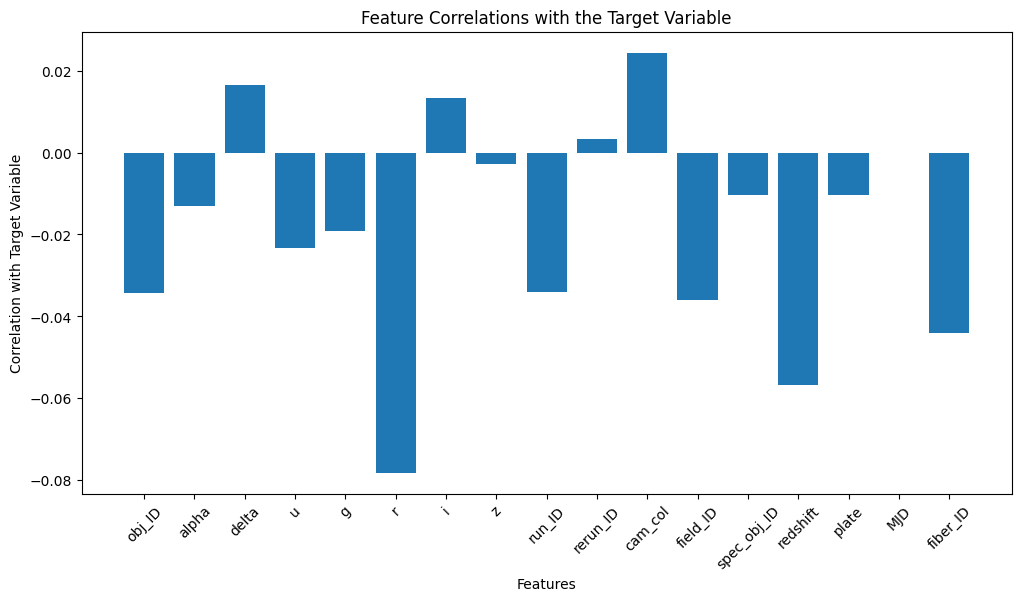

In [11]:
feature_correlations = get_feature_correlations(X_train, y_train, X_names)
plot_feature_correlations(feature_correlations)

#### Feature correlation threshold

In [12]:
correlation_threshold = 0.01

low_correlation_features = get_low_correlation_features(feature_correlations, threshold=correlation_threshold)

print ('Low correlation features:', low_correlation_features)

Low correlation features: ['z', 'rerun_ID', 'MJD']


## Markdown Question: 
**Question**: Explain the logic behind usage of pearson correlation coefficient for feature selection.